# Drug Classification

In [1]:
#EDA Packages
import pandas as pd
import numpy as np

In [2]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
dataset=pd.read_csv(r"C:\Users\yedhu\OneDrive\Desktop\TCS Internship Files\DRUGS  SIDE EFFECTS DATASET.csv")

In [4]:
dataset.head(10)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
5,Aabida,F,valtrex,55.0,"Hispanic, White",No Side Effects
6,Aabidah,F,levoxyl,34.0,White,No Side Effects
7,Aabigail,F,imitrex,28.0,White,Moderate Side Effects
8,Aabir,M,seroquel,38.0,White,Mild Side Effects
9,Aabir,M,minocycline,56.0,White,No Side Effects


In [5]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(dataset.shape,dataset.shape[0],dataset.shape[1]))

Shape of the given dataset is (400000, 6).Contains 400000 rows and 6 columns 


In [6]:
#Feature Names and its Datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [7]:
dataset.describe(include='object')

,NAME,GENDER,DRUG NAME,RACE,SIDE EFFECTS
count,400000,400000,400000,400000,400000
unique,133911,2,502,9,5
top,William,F,paxil,White,Mild Side Effects
freq,42,237751,6269,314074,133236


In [8]:
# Summary statistics for numerical columns
numerical_summary = dataset.describe()

In [9]:
numerical_summary

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [10]:
# Count unique values in categorical columns
categorical_counts = dataset[['GENDER', 'RACE', 'SIDE EFFECTS']].nunique()

In [11]:
categorical_counts

GENDER          2
RACE            9
SIDE EFFECTS    5
dtype: int64

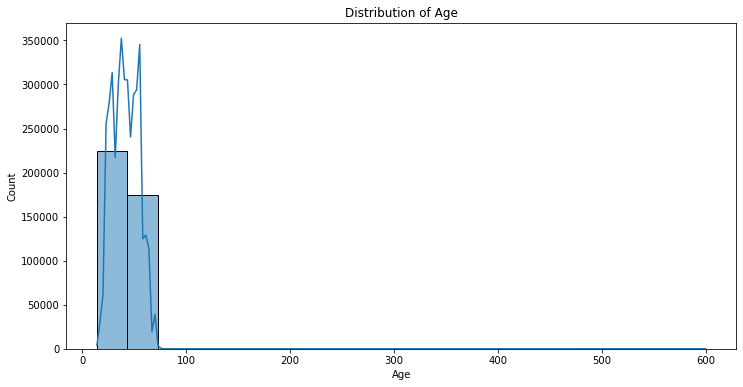

In [12]:
# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='AGE', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

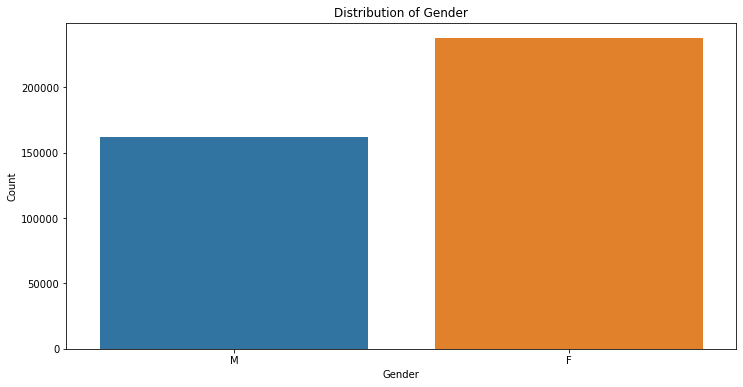

In [13]:
# Distribution of gender wise distribution of data
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='GENDER')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [14]:
dataset['GENDER'].value_counts()

F    237751
M    162249
Name: GENDER, dtype: int64

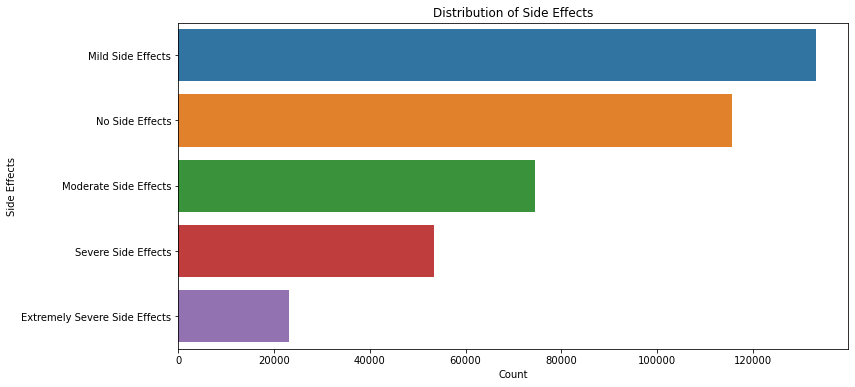

In [15]:
# Side effects distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='SIDE EFFECTS', order=dataset['SIDE EFFECTS'].value_counts().index)
plt.title('Distribution of Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effects')
plt.show()

<Figure size 720x432 with 0 Axes>

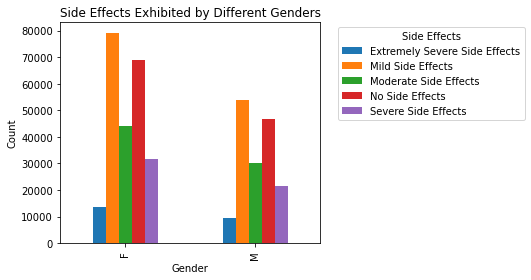

In [16]:
#side effects exhibited by different genders
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
grouped = dataset.groupby(['GENDER', 'SIDE EFFECTS']).size().unstack()
grouped.plot(kind='bar')
plt.title('Side Effects Exhibited by Different Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title='Side Effects', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust the layout to accommodate the legend outside
plt.subplots_adjust(right=0.75)
plt.show()


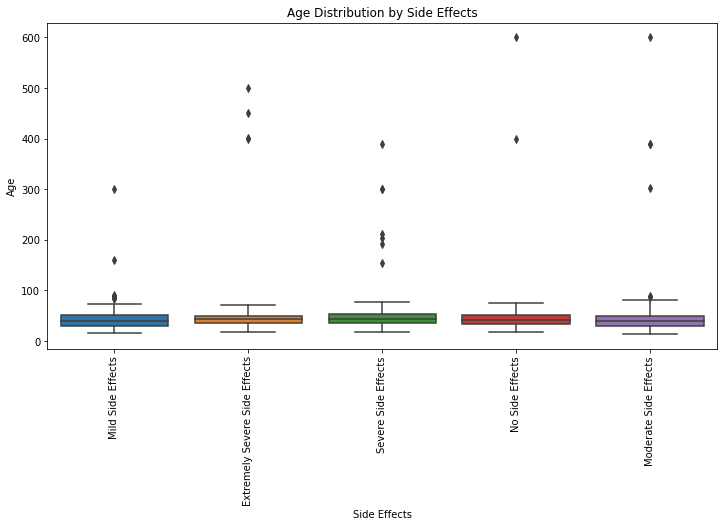

In [17]:
# Box plot to visualize age distribution for each side effect
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='SIDE EFFECTS', y='AGE')
plt.title('Age Distribution by Side Effects')
plt.xticks(rotation=90)
plt.xlabel('Side Effects')
plt.ylabel('Age')
plt.show()

In [18]:
# Calculate the top 10 drugs by frequency
top_10_drugs = dataset['DRUG NAME'].value_counts().head(10)

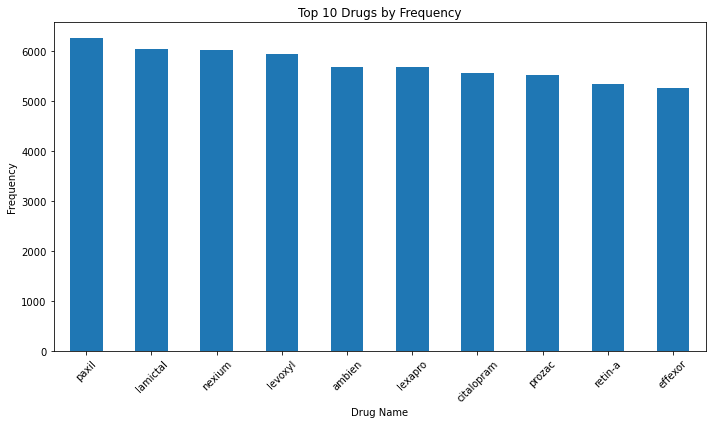

In [19]:
# Create a bar chart for the top 10 drugs
plt.figure(figsize=(10, 6))
top_10_drugs.plot(kind='bar')
plt.title('Top 10 Drugs by Frequency')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()

In [20]:
# Calculate the counts of each side effect category
side_effects_counts = dataset['SIDE EFFECTS'].value_counts()

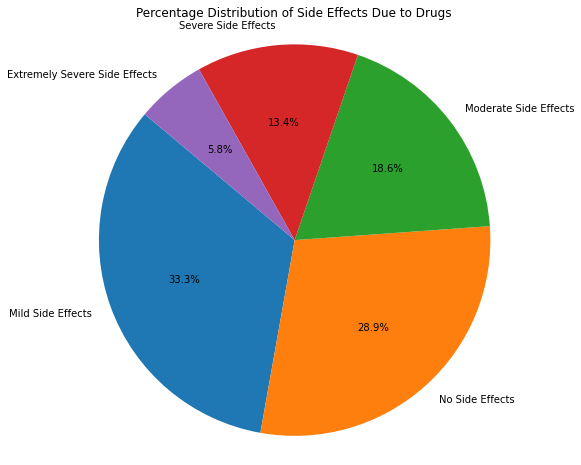

In [21]:
# Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(side_effects_counts, labels=side_effects_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Side Effects Due to Drugs')
plt.axis('equal')
plt.show()

# Data Preprocessing

# Handling Missing Values

In [22]:
#Checking for missing values
dataset.isnull().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [23]:
#Imputation with Mean

In [24]:
# Calculate the mean age
mean_age = dataset['AGE'].mean()

In [25]:
mean_age

41.466513325666284

In [26]:
# Impute missing "AGE" values with the mean age
dataset['AGE'].fillna(mean_age, inplace=True)

In [27]:
# Verify that there are no more missing values in the "AGE" column
missing_values = dataset['AGE'].isnull().sum()
print(f"Number of missing values in 'AGE' column after imputation: {missing_values}")

Number of missing values in 'AGE' column after imputation: 0


# Outlier Detection

# Z - Score Method

In [28]:
# Define a function to detect outliers using Z-score
def find_outliers_zscore(dataset, threshold=3):
    z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
    return z_scores > threshold

In [29]:
dataset.columns

Index(['NAME', 'GENDER', 'DRUG NAME', 'AGE', 'RACE', 'SIDE EFFECTS'], dtype='object')

In [30]:
# Find outliers in all columns (except the 'activityID' and 'PeopleId' columns if they exist)
outliers_all_columns = dataset.drop(columns=['NAME', 'GENDER', 'DRUG NAME','RACE', 'SIDE EFFECTS']).apply(find_outliers_zscore)

In [31]:
# Show the rows where any column has an outlier
outliers_rows = outliers_all_columns.any(axis=1)
outliers_detected = dataset[outliers_rows]

In [32]:
# Get the index of potential outliers
potential_outliers_index = outliers_detected.index

In [33]:
potential_outliers_index

Int64Index([  3008,  41048,  43016,  52650,  60136,  61606,  66169,  85047,
             93226, 111850, 119574, 127240, 145846, 168426, 171643, 174039,
            174487, 186893, 209780, 218988, 224733, 232518, 242302, 245321,
            259034, 264849, 266215, 275520, 290165, 295943, 300452, 315506,
            325628, 325631, 333669, 337790, 363934, 384352, 393820],
           dtype='int64')

In [34]:
# Remove the potential outliers from the original DataFrame
df_cleaned = dataset.drop(index=potential_outliers_index)

In [35]:
df_cleaned

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects


In [36]:
# After removing outliers and storing the cleaned DataFrame in 'df_cleaned'
# Reset the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

In [37]:
df_cleaned

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399956,TRUE,M,lamisil,50.0,White,Severe Side Effects
399957,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399958,TRUE,M,celexa,57.0,Other,Severe Side Effects
399959,TRUE,F,zoloft,59.0,White,No Side Effects


In [38]:
df_cleaned['DRUG NAME'].nunique()

502

In [39]:
# Create a list of columns to keep (excluding "Name")
columns_to_keep = ["AGE", "GENDER", "RACE", "DRUG NAME","SIDE EFFECTS"]

In [40]:
# Select only the columns you want to keep
df = df_cleaned[columns_to_keep]

In [41]:
df

,AGE,GENDER,RACE,DRUG NAME,SIDE EFFECTS
0,41.0,M,White,topamax,Mild Side Effects
1,53.0,M,"Hispanic, White",zocor,Extremely Severe Side Effects
2,31.0,F,White,tazorac,Mild Side Effects
3,44.0,F,White,voltaren,Severe Side Effects
4,24.0,M,White,tramadol,No Side Effects
...,...,...,...,...,...
399956,50.0,M,White,lamisil,Severe Side Effects
399957,55.0,M,"Hispanic, White",klaron,No Side Effects
399958,57.0,M,Other,celexa,Severe Side Effects
399959,59.0,F,White,zoloft,No Side Effects


In [42]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RACE'] = le.fit_transform(df['RACE'])

C:\Users\yedhu\AppData\Local\Temp\ipykernel_19056\1229009394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RACE'] = le.fit_transform(df['RACE'])


In [44]:
df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRUG NAME', 'SIDE EFFECTS'], dtype='object')

In [45]:
df

,AGE,GENDER,RACE,DRUG NAME,SIDE EFFECTS
0,41.0,M,8,topamax,Mild Side Effects
1,53.0,M,5,zocor,Extremely Severe Side Effects
2,31.0,F,8,tazorac,Mild Side Effects
3,44.0,F,8,voltaren,Severe Side Effects
4,24.0,M,8,tramadol,No Side Effects
...,...,...,...,...,...
399956,50.0,M,8,lamisil,Severe Side Effects
399957,55.0,M,5,klaron,No Side Effects
399958,57.0,M,6,celexa,Severe Side Effects
399959,59.0,F,8,zoloft,No Side Effects


In [46]:
df['SIDE EFFECTS'] = le.fit_transform(df['SIDE EFFECTS'])

C:\Users\yedhu\AppData\Local\Temp\ipykernel_19056\2354619312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SIDE EFFECTS'] = le.fit_transform(df['SIDE EFFECTS'])


In [47]:
df

,AGE,GENDER,RACE,DRUG NAME,SIDE EFFECTS
0,41.0,M,8,topamax,1
1,53.0,M,5,zocor,0
2,31.0,F,8,tazorac,1
3,44.0,F,8,voltaren,4
4,24.0,M,8,tramadol,3
...,...,...,...,...,...
399956,50.0,M,8,lamisil,4
399957,55.0,M,5,klaron,3
399958,57.0,M,6,celexa,4
399959,59.0,F,8,zoloft,3


In [48]:
# Use the pandas get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(df, columns=["GENDER"])

In [49]:
df_encoded

,AGE,RACE,DRUG NAME,SIDE EFFECTS,GENDER_F,GENDER_M
0,41.0,8,topamax,1,0,1
1,53.0,5,zocor,0,0,1
2,31.0,8,tazorac,1,1,0
3,44.0,8,voltaren,4,1,0
4,24.0,8,tramadol,3,0,1
...,...,...,...,...,...,...
399956,50.0,8,lamisil,4,0,1
399957,55.0,5,klaron,3,0,1
399958,57.0,6,celexa,4,0,1
399959,59.0,8,zoloft,3,1,0


# Target Encoding (Mean Encoding):

In [50]:
from category_encoders import TargetEncoder

In [51]:
# Initialize the TargetEncoder
encoder = TargetEncoder(cols=['DRUG NAME'])

In [52]:
# Fit the encoder on your dataset
encoder.fit(df_encoded['DRUG NAME'], df_encoded['SIDE EFFECTS'])

TargetEncoder(cols=['DRUG NAME'])

In [53]:
# Transform the "DRUG NAME" column with the encoded values
df_encoded['DRUG NAME'] = encoder.transform(df_encoded['DRUG NAME'])

In [54]:
df_encoded

,AGE,RACE,DRUG NAME,SIDE EFFECTS,GENDER_F,GENDER_M
0,41.0,8,1.160710,1,0,1
1,53.0,5,0.270096,0,0,1
2,31.0,8,1.423009,1,1,0
3,44.0,8,2.631914,4,1,0
4,24.0,8,2.265635,3,0,1
...,...,...,...,...,...,...
399956,50.0,8,3.303950,4,0,1
399957,55.0,5,3.000000,3,0,1
399958,57.0,6,2.886569,4,0,1
399959,59.0,8,2.680885,3,1,0


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# Assuming df is your DataFrame containing the features to be scaled
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)